In [78]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from typing import List
from sklearn.model_selection import train_test_split

In [79]:
df = pd.read_csv('final_house.csv')

df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Surroundings type', inplace=True, axis=1)
df.drop('Type of property', inplace=True, axis=1)
df.drop('Heating type', inplace=True, axis=1)
df.drop('Locality', inplace=True, axis=1)

def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        # print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df
df = remove_outliers(df, ['Living area'], 3)
df = remove_outliers(df, ['Surface of the land'], 4)
# df = remove_outliers(df, ['Garden surface'], 3)
# df = remove_outliers(df, ['Terrace surface'], 3)
# print(df['Living area'].max())
# print(df['Surface of the land'].max())
df

,id,Price,Subtype of property,Energy class,Province,Zip,Living area,Surface of the land,Number of rooms,Bathrooms,...,Garden,Garden surface,Primary energy consumption,Kitchen values,Building Cond. values,Parking,Urban_value,Mansion,House_villa,Other_house
0,10597213,380000.0,house,D,Liège,4000.0,216.0,2100.0,5.0,1.0,...,1.0,1800.0,335.0,1.0,4.0,6.0,1,0,1,0
1,10594958,315000.0,house,F,Liège,4400.0,182.0,1580.0,3.0,1.0,...,1.0,1000.0,480.0,2.0,2.0,6.0,1,0,1,0
2,10595263,750000.0,villa,B,Walloon Brabant,1420.0,274.0,1567.0,3.0,2.0,...,1.0,1428.0,157.0,3.0,4.0,7.0,1,0,1,0
3,10593759,179000.0,house,D,Liège,4020.0,112.0,135.0,3.0,1.0,...,1.0,35.0,304.0,1.0,3.0,1.0,0,0,1,0
4,10593565,209000.0,house,C,East Flanders,9600.0,132.0,180.0,3.0,1.0,...,1.0,80.0,252.0,3.0,3.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8864,10508973,320000.0,house,D,Limburg,3540.0,143.0,667.0,3.0,1.0,...,0.0,0.0,383.0,1.4,2.0,1.0,0,0,1,0
8865,10514297,320000.0,mixed use building,D,East Flanders,9240.0,125.0,144.0,2.0,1.0,...,0.0,0.0,310.0,1.0,3.0,0.0,0,0,1,0
8866,10562843,324000.0,house,F,East Flanders,9300.0,126.0,679.0,3.0,1.0,...,0.0,0.0,527.0,1.0,1.0,1.0,0,0,1,0
8867,10523249,325000.0,house,Not specified,Flemish Brabant,1500.0,171.0,294.0,5.0,1.8,...,0.0,0.0,339.6,2.2,2.8,0.0,0,0,1,0


In [80]:
# df_urbain = pd.read_csv('utils/Urbain.csv')
# postcode_set = set(df_urbain['Postcode'])
# df['Urban_value'] = df['Zip'].apply(lambda x: 1 if x in postcode_set else 0)

In [81]:
# df.isnull().sum().sort_values(ascending=False)

In [82]:
features = list(df.drop(columns=['Zip','Price', 'id','Subtype of property','Energy class','Province'
                                 ]).columns)

X = df[features].to_numpy()
y = df[['Price']].to_numpy().reshape(-1 , 1)

# Instantiate the scaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression() 
lm.fit(X_train, y_train)

#normalize the whole dataset for scoring
X = scaler.transform(X)

score = lm.score(X_test, y_test)
coeff_df = pd.DataFrame(lm.coef_, columns=features)
coeff_df = coeff_df.T
coeff_df.columns = ['Coefficient']
predictions = lm.predict(X_test) 
# coeff_df

(5143, 21)
(8572, 21)
score:
0.5908355787239983
[464422.08765791]


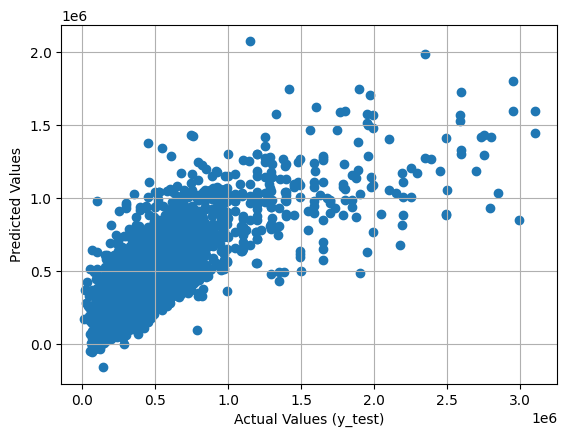

/tmp/ipykernel_706/3163518488.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

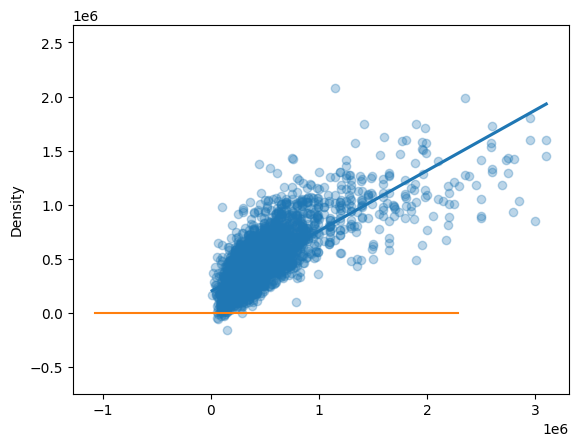

In [83]:
print(X_train.shape)
print(X.shape)

print('score:')
print(score)
print(lm.intercept_)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})
plt.axis('equal')

sns.distplot((y_test-predictions),bins=50)

In [84]:
# df.skew()

In [85]:
'''
'Living area'
'Number of rooms'
'Garden surface'
'Terrace surface'
'Open fire'
'Surface of the land'
'Number of facades'
'Swimming pool'
'Building Cond. values'
'Kitchen values'
'Primary energy consumption'
'Energy efficiency'
'''

"\n'Living area'\n'Number of rooms'\n'Garden surface'\n'Terrace surface'\n'Open fire'\n'Surface of the land'\n'Number of facades'\n'Swimming pool'\n'Building Cond. values'\n'Kitchen values'\n'Primary energy consumption'\n'Energy efficiency'\n"

Score:
0.5910676656656058
Intercept:
465538.63185136026
                        Coefficient
Living area            1.531310e+05
Surface of the land    3.571259e+04
Number of rooms       -7.026670e+03
Bathrooms              9.117103e+04
Construction year      5.776763e+03
Number of facades      2.379794e+04
Swimming pool          2.995451e+04
Open fire              8.664909e+03
Terrace                1.362915e+04
Terrace surface       -8.595152e+03
Garden surface        -8.534929e+03
Kitchen values         4.349576e+04
Building Cond. values  4.000064e+04
Parking                7.006246e+03
Urban_value            6.418414e+04
Mansion               -2.329252e+18
House_villa           -3.240146e+18
Other_house           -2.355493e+18


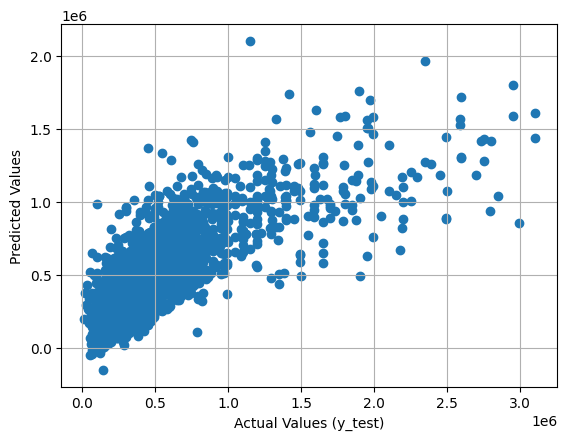

(5143, 18)
(8572, 18)


In [97]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

features = list(df.drop(columns=['Zip','Price', 'id','Primary energy consumption',
                                 'Subtype of property','Energy class','Province']).columns)

X = df[features]
y = df['Price']
# Instantiate the scaler
scaler = StandardScaler()
# Feature selection
selector = SelectKBest(score_func=f_regression, k=18)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the model and making predictions

lm = LinearRegression() 
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Scoring the model
score = lm.score(X_test, y_test)

# Getting selected features
mask = selector.get_support()
selected_features = [feature for feature, boolean in zip(features, mask) if boolean]

# Creating coefficient DataFrame
coeff_df = pd.DataFrame(lm.coef_.reshape(-1, 1), index=selected_features, columns=['Coefficient'])

print('Score:')
print(score)
print('Intercept:')
print(lm.intercept_)

print(coeff_df)

# Plotting predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

print(X_train.shape)
print(X.shape)